<a href="https://colab.research.google.com/github/drod75/cisc3225/blob/main/extra_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 1 Exploratory Analysis: Pok´emon (5 points)

In [ ]:
link = 'https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/refs/heads/main/pokemon.csv'

pokemon_df = pd.read_csv(link)
pokemon_df.head()

,attack,base_happiness,cap_rate,defense,exp_growth,height,hp,name,pokedex_number,speed,type_1,type_2,weight,generation,is_legendary
0,49,70,45,49,1059860,0.7,45,Bulbasaur,1,45,grass,poison,6.9,1,0
1,62,70,45,63,1059860,1.0,60,Ivysaur,2,60,grass,poison,13.0,1,0
2,100,70,45,123,1059860,2.0,80,Venusaur,3,80,grass,poison,100.0,1,0
3,52,70,45,43,1059860,0.6,39,Charmander,4,65,fire,NaN,8.5,1,0
4,64,70,45,58,1059860,1.1,58,Charmeleon,5,80,fire,NaN,19.0,1,0


In [ ]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   attack          800 non-null    int64  
 1   base_happiness  800 non-null    int64  
 2   cap_rate        800 non-null    int64  
 3   defense         800 non-null    int64  
 4   exp_growth      800 non-null    int64  
 5   height          780 non-null    float64
 6   hp              800 non-null    int64  
 7   name            800 non-null    object 
 8   pokedex_number  800 non-null    int64  
 9   speed           800 non-null    int64  
 10  type_1          800 non-null    object 
 11  type_2          416 non-null    object 
 12  weight          780 non-null    float64
 13  generation      800 non-null    int64  
 14  is_legendary    800 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 93.9+ KB


In [ ]:
pokemon_df.dtypes == 'object'

,0
attack,False
base_happiness,False
cap_rate,False
defense,False
exp_growth,False
height,False
hp,False
name,True
pokedex_number,False
speed,False


In [ ]:
pokemon_df[['name', 'type_1', 'type_2']]

,name,type_1,type_2
0,Bulbasaur,grass,poison
1,Ivysaur,grass,poison
2,Venusaur,grass,poison
3,Charmander,fire,NaN
4,Charmeleon,fire,NaN
...,...,...,...
795,Celesteela,steel,flying
796,Kartana,grass,steel
797,Guzzlord,dark,dragon
798,Necrozma,psychic,NaN


1a) There are three categorical columns, name, type_1, and type_2, Name is the name and the types are the types for the pokemon, pokemon have to have at least on type and each type they have must be distinct, so they can only have fire and not fire fire.

In [ ]:
continuous_columns = ['attack', 'base_happiness', 'cap_rate', 'defense', 'exp_growth', 'hp', 'speed', 'height', 'weight']

pokemon_df[continuous_columns].describe()

,attack,base_happiness,cap_rate,defense,exp_growth,hp,speed,height,weight
count,800.000000,800.000000,800.000000,800.000000,8.000000e+02,800.000000,800.000000,780.000000,780.000000
mean,77.830000,65.356250,98.761250,73.025000,1.054990e+06,68.970000,66.267500,1.165000,61.405513
std,32.169391,19.610521,76.257825,30.784964,1.603560e+05,26.590749,28.863295,1.080576,109.422248
min,5.000000,0.000000,3.000000,5.000000,6.000000e+05,1.000000,5.000000,0.100000,0.100000
25%,55.000000,70.000000,45.000000,50.000000,1.000000e+06,50.000000,45.000000,0.600000,9.000000
50%,75.000000,70.000000,60.000000,70.000000,1.000000e+06,65.000000,65.000000,1.000000,27.150000
75%,100.000000,70.000000,170.000000,90.000000,1.059860e+06,80.000000,85.000000,1.500000,64.850000
max,185.000000,140.000000,255.000000,230.000000,1.640000e+06,255.000000,180.000000,14.500000,999.900000


1b) The continuous columns are attack, base_happiness, cap_rate, defense, exp_growth, hp, speed, height, weight

In [ ]:
pokemon_df.isna().sum()

,0
attack,0
base_happiness,0
cap_rate,0
defense,0
exp_growth,0
height,20
hp,0
name,0
pokedex_number,0
speed,0


2a) Yes there are missing values, in height and type 2, type 2 makes sense since a second type is not mandatory, height meanwhile is very common so missing height values must be an error or weird case.

2b) For type if there are actual missing type 2 it would be very useful because types have weaknesses and resistances, and mutli type pokemon have the two ladder options shared and in some cases cancel each other out. For height it could contain useful info for people looking to average any of the stats by height, so yes either column could have useful data.

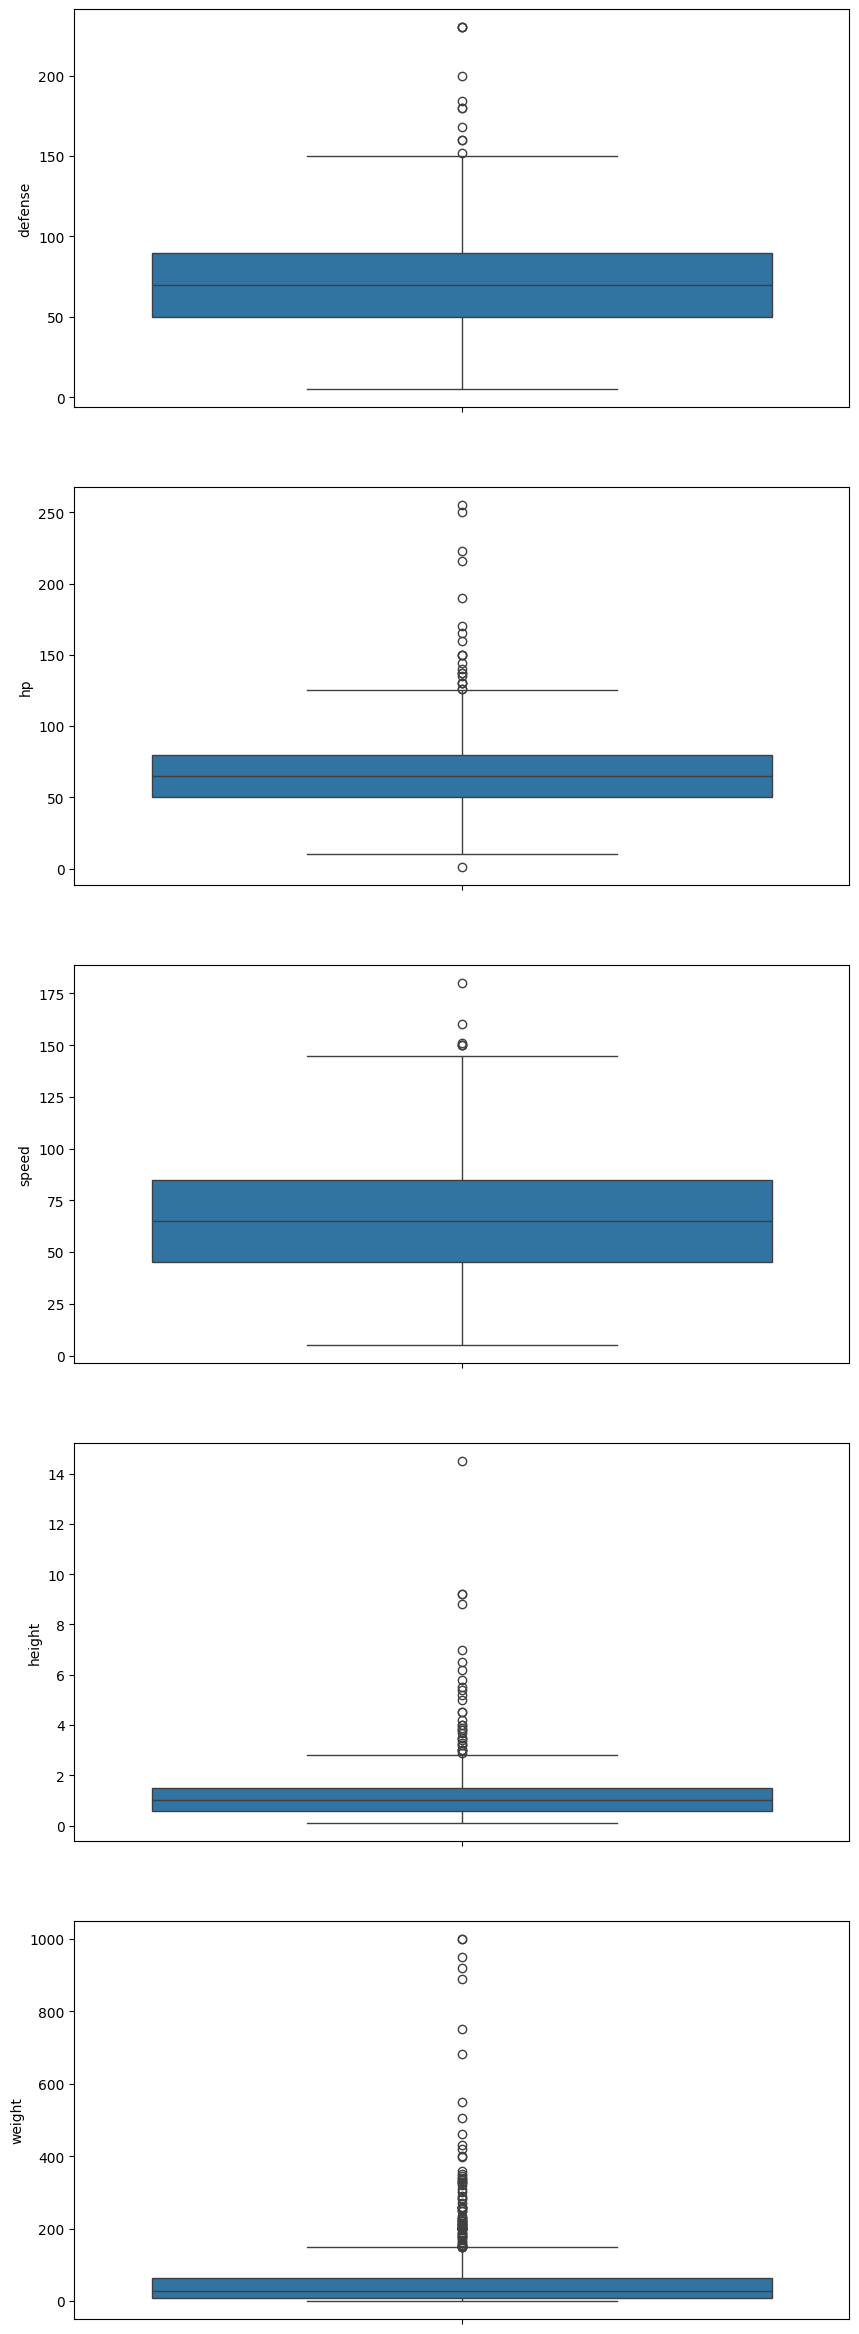

In [ ]:
continuous_5 = ['defense', 'hp','speed', 'height', 	'weight']

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 1, figsize=(10, 30))

# box plots for each in pokemon_df\
for i, col in enumerate(continuous_5):
    sns.boxplot(data=pokemon_df[col], ax=axes[i])
plt.show()


3a) For speed the lower boundry lies between about 5 and the upper boundry is a bit under 150, the majority of points lie between just under 50 around 80.

3b) There are outlier values and there seems to be just a few, the majority of them are at around 150 while 1 is some were near 160 and one is all the way above 175.

<Axes: >

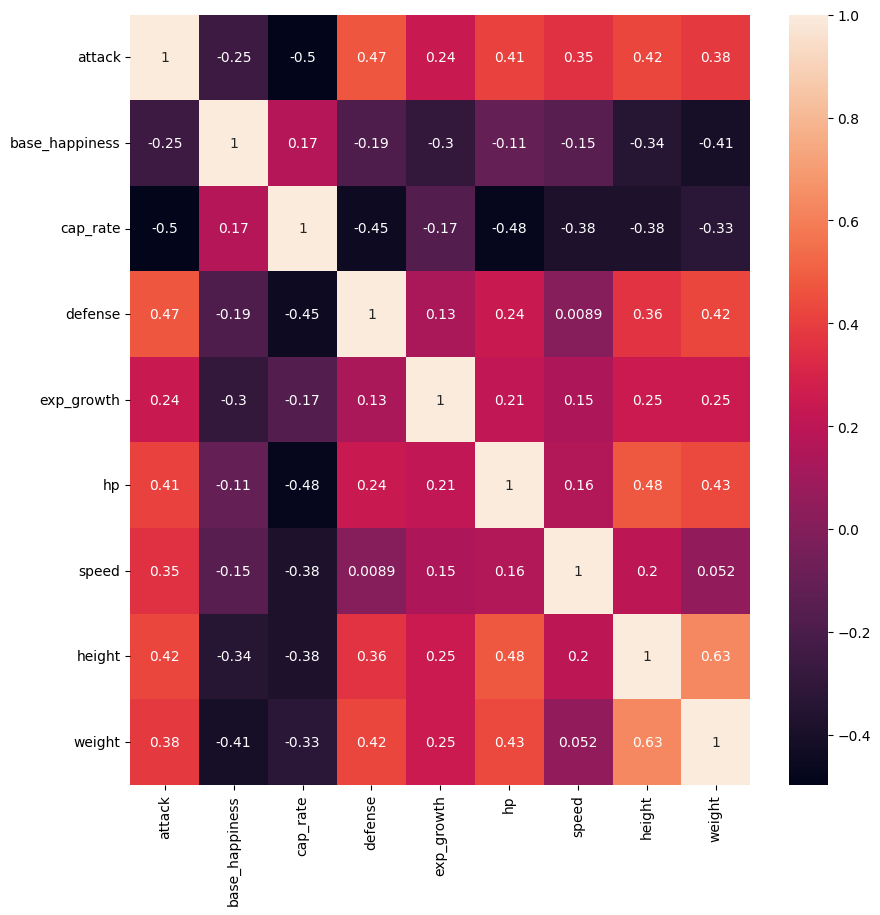

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(pokemon_df[continuous_columns].corr(), annot=True)

4) One moderate to strong correlation is weight and height, this make sense as beings of a ceratin height typically have a certain weight, or that more pounds and weight are to put to taller pokemon to make them seem fit or normally sized compared to their height.

# 2 Grouping

In [ ]:
ptw = pokemon_df.groupby('type_1')['weight'].agg(['mean', 'median', 'min', 'max']).sort_values(by=['mean', 'median', 'min', 'max'], ascending=False)
ptw

,mean,median,min,max
type_1,,,,
steel,188.841667,80.75,1.1,999.9
ground,150.044444,68.00,6.5,950.0
dragon,107.125926,60.00,2.8,345.0
ice,103.260870,55.40,5.7,505.0
rock,94.270000,58.00,5.7,340.0
ghost,69.570370,15.00,0.1,750.0
dark,69.096552,30.00,2.1,888.0
fire,66.096000,36.25,2.5,430.0
fighting,58.675000,44.00,7.0,253.8


2a) It seems that typically steel types have the heaviest pokemon, with ground at a good second, this is because metal is culturally heavier and in pokemon steel pokemon can be very heavy, this can apply to ground pokemon to but steel pokemon contain very heavy examples like aagron, steelix, and metagross

In [ ]:
pgcr = pokemon_df.groupby('generation')['cap_rate'].agg(['mean', 'median']).sort_values(by=['mean', 'median'], ascending=False)
pgcr

,mean,median
generation,,
3,113.355556,90.0
1,106.185430,75.0
5,103.102564,75.0
6,100.402778,62.5
2,91.900000,60.0
7,85.202532,45.0
4,78.859813,45.0


2b) It seems that the generation with the higher capture rate on average and most occuring is generation, generation 3 had a mean leading by 6 points and a median leading by a whopping 15.

# 3 Hierarchical Indexing (3 points)

In [ ]:
ptypes = pokemon_df.groupby(['type_1', 'type_2'])[continuous_columns].mean()
ptypes

attack  base_happiness    cap_rate     defense  \
type_1 type_2                                                         
bug    electric   69.000000       70.000000  107.500000   73.750000   
       fairy      50.000000       70.000000  132.500000   50.000000   
       fighting  153.666667       23.333333  108.333333   97.000000   
       fire       72.500000       70.000000   30.000000   60.000000   
       flying     63.615385       70.000000   79.615385   57.076923   
...                     ...             ...         ...         ...   
water  ice        83.333333       70.000000   60.000000  113.333333   
       poison     68.333333       70.000000   98.333333   61.666667   
       psychic    79.000000       70.000000   95.000000   96.000000   
       rock       82.750000       70.000000   43.750000  115.250000   
       steel      86.000000       70.000000   45.000000   88.000000   

                   exp_growth         hp       speed  height      weight  
type_1 type_2                                                             
bug    electric  1.000000e+06  63.500000   63.000000   0.725   17.600000  
       fairy     1.000000e+06  50.000000  104.000000   0.150    0.350000  
       fighting  1.250000e+06  86.000000  101.666667   1.900  137.533333  
       fire      1.250000e+06  70.000000   80.000000   1.350   37.400000  
       flying    9.476708e+05  62.846154   82.692308   1.100   27.092308  
...                       ...        ...         ...     ...         ...  
water  ice       1.166667e+06  90.000000   66.666667   1.900  157.500000  
       poison    1.166667e+06  61.666667   85.000000   1.000   34.800000  
       psychic   1.050000e+06  81.600000   56.400000   1.360   58.600000  
       rock      1.012500e+06  73.250000   36.000000   0.875   31.475000  
       steel     1.059860e+06  84.000000   60.000000   1.700   84.500000  

[148 rows x 9 columns]

In [ ]:
# The average weight of water (Type 1) Pok´emon.
idx = pd.IndexSlice
ptypes.loc[idx['water', :], idx['weight':]]

weight
type_1 type_2              
water  bug        43.000000
       dark       45.600000
       dragon    244.000000
       electric   17.250000
       fairy      25.550000
       fighting   51.250000
       flying     83.885714
       ghost      84.000000
       grass      30.033333
       ground     36.422222
       ice       157.500000
       poison     34.800000
       psychic    58.600000
       rock       31.475000
       steel      84.500000

In [ ]:
# 2. The average weight of water (Type 1) bug (type2) Pok´emon
ptypes.loc[idx['water', 'bug'], idx['weight':]]

,water
,bug
weight,43.0


In [ ]:
# The average weight of bug (Type 2) Pok´emon shorter than 1m

ptypes.loc[idx[:,'bug'], idx['weight':]][ptypes['height'] < 1]

<ipython-input-55-139f5b1a2e85>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ptypes.loc[idx[:,'bug'], idx['weight':]][ptypes['height'] < 1]


,,weight
type_1,type_2,
poison,bug,12.0
